In [23]:
import pandas as pd
import numpy as np

In [24]:
train = pd.read_csv("database/train.csv")
test = pd.read_csv("database/test.csv")

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [26]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [27]:
train_x = train[["UNDER_CONSTRUCTION","RERA","BHK_NO.","SQUARE_FT","READY_TO_MOVE","RESALE","LATITUDE","LONGITUDE"]]
train_y = train[["TARGET(PRICE_IN_LACS)"]]
train_y["target"] = train_y[["TARGET(PRICE_IN_LACS)"]]

C:\Users\my_mctria\AppData\Local\Temp\ipykernel_27820\1325901727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y["target"] = train_y[["TARGET(PRICE_IN_LACS)"]]


In [28]:
train_y = train_y[["target"]]

In [29]:
test_x = test[["UNDER_CONSTRUCTION","RERA","BHK_NO.","SQUARE_FT","READY_TO_MOVE","RESALE","LATITUDE","LONGITUDE"]]
train_x.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LATITUDE,LONGITUDE
0,0,0,2,1300.236407,1,1,77.597960,12.969910
1,0,0,2,1275.000000,1,1,76.644605,12.274538
2,0,0,2,933.159722,1,1,77.632191,12.778033
3,0,1,2,929.921143,1,1,77.344500,28.642300
4,1,0,2,999.009247,0,1,88.484911,22.592200


In [30]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

<AxesSubplot: >

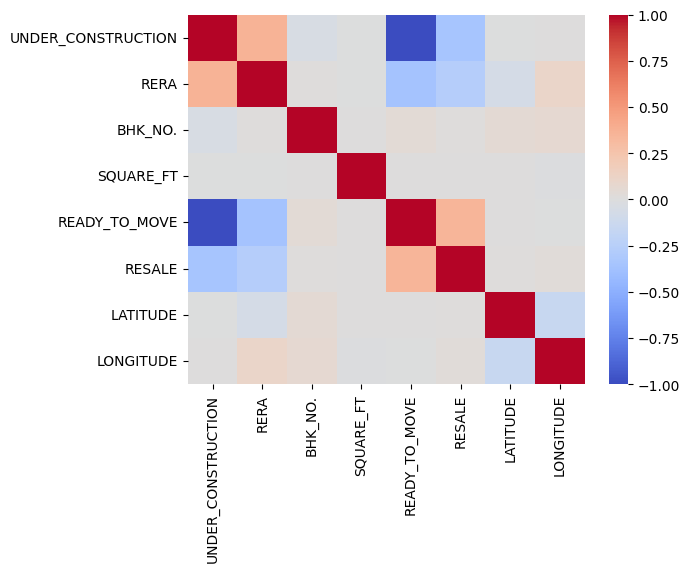

In [31]:
sns.heatmap(train_x.corr(), cmap="coolwarm")

In [32]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [36]:
x1 = model.predict(train_x) #*100000
y1 = train_y["target"].head() #*100000
x1

array([[94.24923692],
       [98.22640743],
       [94.85415261],
       ...,
       [45.42200342],
       [90.53991648],
       [75.73578577]])

In [46]:
def predict(bhk,sqr_ft,uc=0,rr=0,rtm=1,rs=0,la=12.969910,lo=77.597960):
    user_data = pd.DataFrame(data=[[uc,rr,bhk,sqr_ft,rtm,rs,la,lo]],columns=["UNDER_CONSTRUCTION","RERA","BHK_NO.","SQUARE_FT","READY_TO_MOVE","RESALE","LATITUDE","LONGITUDE"])
    print(model.predict(user_data)[0][0]*1000000)
    
predict(2,500)

489371733.10909235
